<font size="7"><span style="color:green">Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import AdaBoostClassifier 
import xgboost
    # NOTA
    # xgboost.XGBRFClassifier En cada secuencia tiene un RandomForest
    # xgboost.XGBClassifier sin RandomForest
# ------------------
# Pipeline
from sklearn.pipeline import Pipeline
    # NOTA
    # Hay que poner las etiquetas manualmente. El otro es 'from sklearn.pipeline import make_pipeline'
# ------------------
# Métricas de validación
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# ------------------
# GridSearch
from sklearn.model_selection import GridSearchCV
# ------------------
# Balanceo
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
# ------------------
# Otras
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
# ------------------
# Pickle
import pickle

------

<font size="7"><span style="color:green">Lectura DataSet y vistazo rápido de lo que contiene

-----

In [2]:
# LECTURA CSV
vinos = pd.read_csv('data/winequalityN.csv')

In [3]:
vinos.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


-----

In [5]:
# Hacemos otro df con sólo los vinos blancos
blanco=vinos[vinos['type']=='white'].reset_index()
blanco = blanco.drop(['index', 'type'], axis=1)

In [6]:
blanco.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
blanco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4890 non-null   float64
 1   volatile acidity      4891 non-null   float64
 2   citric acid           4896 non-null   float64
 3   residual sugar        4896 non-null   float64
 4   chlorides             4896 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4891 non-null   float64
 9   sulphates             4896 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
blanco.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,5.877909
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000



------

<font size="7"><span style="color:green">Modificando las Features del DataFrame

---

In [9]:
# Nos deshacemos de los valores nulos

print("Columnas pre drop:", len(blanco))
blanco = blanco.dropna()
print("Columnas post drop:", len(blanco))

Columnas pre drop: 4898
Columnas post drop: 4870


-----

In [10]:
# Cambiamos la variable Target para que sea solo entre 'aptos=1' y 'no aptos=0'
my_dict={3:0, 4:0, 5:0,
        6:1, 7:1, 8:1, 9:1}
blanco['apto']= blanco['quality'].map(my_dict)
blanco = blanco.drop(['quality'], axis=1)

----

In [11]:
# BINNING

# Creamos nueva feature 'bound sulfur dioxide'.
# El 'total sulfure dioxide' está compuesto por 'bound sulfur dioxide' + el 'free sulfur dioxide', así que sacamos con ellas el 'bound'y eliminamos el 'total'. 
# El modelo predice mejor así y es un feature básico de cualquier vino, por lo que es fácil de integrarlo si recibimos nuevos vinos.

blanco.insert(5,'bound sulfur dioxide', (blanco['total sulfur dioxide']-blanco['free sulfur dioxide']))
blanco = blanco.drop(['total sulfur dioxide'], axis=1)

-----

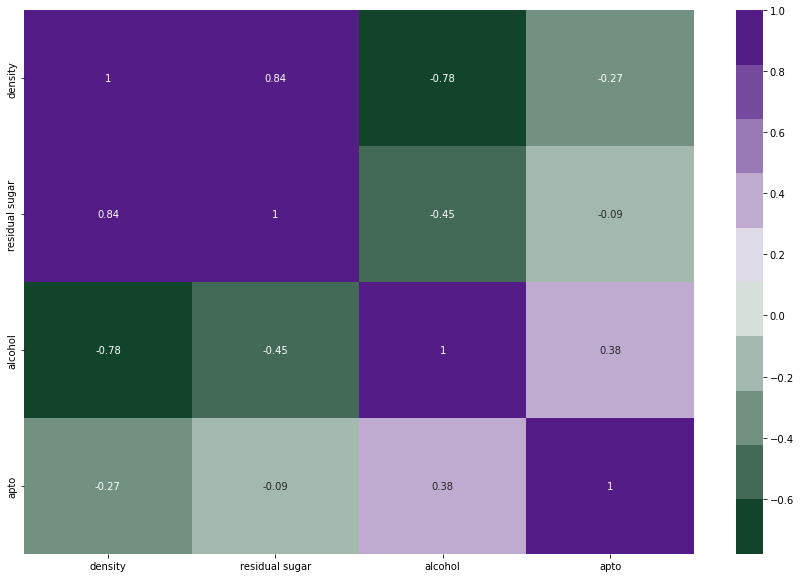

In [12]:
# Quitamos la variable 'density', ya que su valor depende en gran medida en la convinación de 'residual sugar' y 'alcohol'

plt.figure(figsize=(15,10))
sns.heatmap(blanco[['density', 'residual sugar', 'alcohol','apto']].corr(),cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10), annot=True);

blanco = blanco.drop(['density'], axis=1)

------

In [13]:
# OUTLIERS

c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an 

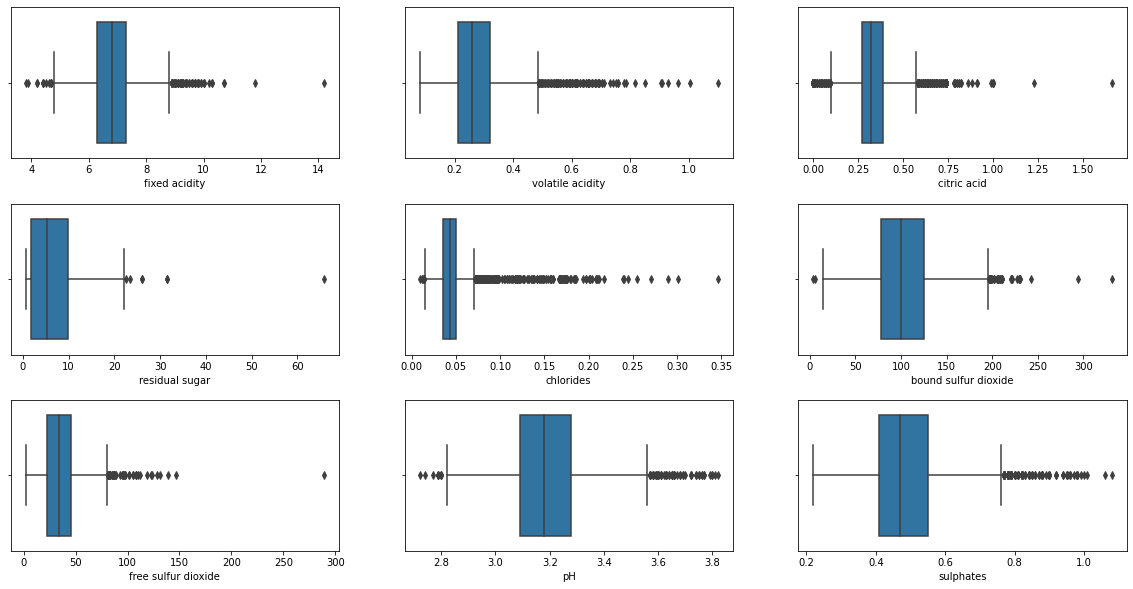

In [14]:
# Visualización de Outliers con boxplot
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.3);

sns.boxplot(blanco['fixed acidity'], ax=axes[0, 0]);
sns.boxplot(blanco['volatile acidity'], ax=axes[0, 1]);
sns.boxplot(blanco['citric acid'], ax=axes[0, 2]);
sns.boxplot(blanco['residual sugar'], ax=axes[1, 0]);
sns.boxplot(blanco['chlorides'], ax=axes[1, 1]);
sns.boxplot(blanco['bound sulfur dioxide'], ax=axes[1, 2]);
sns.boxplot(blanco['free sulfur dioxide'], ax=axes[2, 0]);
sns.boxplot(blanco['pH'], ax=axes[2, 1]);
sns.boxplot(blanco['sulphates'], ax=axes[2, 2]);


In [15]:
# def para quitar Outliers
from scipy.stats import iqr

def outliers_quantie(df, feature, param=1.5):  
        
    iqr_ = iqr(df[feature], nan_policy='omit')
    q1 = np.nanpercentile(df[feature], 25)
    q3 = np.nanpercentile(df[feature], 75)
    
    th1 = q1 - iqr_*param
    th2 = q3 + iqr_*param
    
    return df[(df[feature] >= th1) & (df[feature] <= th2)].reset_index(drop=True)


In [16]:
# Quitamos Outliers de algunas variables
print("Len original:", len(blanco))
blanco = outliers_quantie(blanco, 'residual sugar')
print("Len sin outliers en residual sugar:", len(blanco))

print("Len original:", len(blanco))
blanco = outliers_quantie(blanco, 'citric acid')
print("Len sin outliers en citric acid:", len(blanco))

print("Len original:", len(blanco))
blanco = outliers_quantie(blanco, 'chlorides')
print("Len sin outliers en chlorides:", len(blanco))

print("Len original:", len(blanco))
blanco = outliers_quantie(blanco, 'bound sulfur dioxide')
print("Len sin outliers en bound sulfur dioxide:", len(blanco))

print("Len original:", len(blanco))
blanco = outliers_quantie(blanco, 'free sulfur dioxide')
print("Len sin outliers en free sulfur dioxide:", len(blanco))

Len original: 4870
Len sin outliers en residual sugar: 4863
Len original: 4863
Len sin outliers en citric acid: 4598
Len original: 4598
Len sin outliers en chlorides: 4426
Len original: 4426
Len sin outliers en bound sulfur dioxide: 4398
Len original: 4398
Len sin outliers en free sulfur dioxide: 4343


------

<font size="7"><span style="color:green">Visualización de la correlación

---

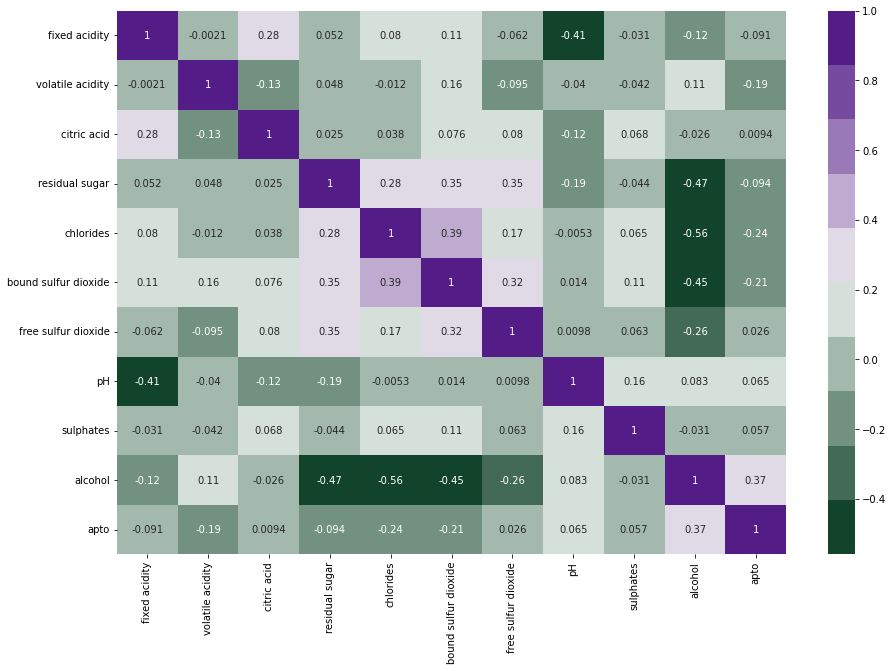

In [17]:
# Heatmap para ver la correlación de los datos
plt.figure(figsize=(15,10))
sns.heatmap(blanco.corr(),cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10), annot=True);


------

<font size="7"><span style="color:green">Balanceo de datos y selección de Features y Target

---

Value Counts  1    0.691227
0    0.308773
Name: apto, dtype: float64


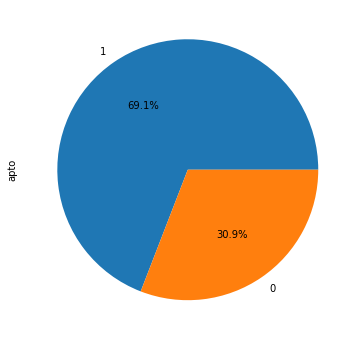

In [18]:
#  Visualización del balance de los datos
print('Value Counts ', blanco['apto'].value_counts(normalize=True))
plt.figure(figsize=(10,6))
blanco['apto'].value_counts().plot.pie(autopct="%.1f%%");

In [19]:
# Features y Target
X = blanco.iloc[:,:-1]
y = blanco['apto']

In [20]:
# SEED
seed=33

In [21]:
# Balanceo ROS
ros = RandomOverSampler(random_state=seed)
X_ros, y_ros = ros.fit_resample(X, y)


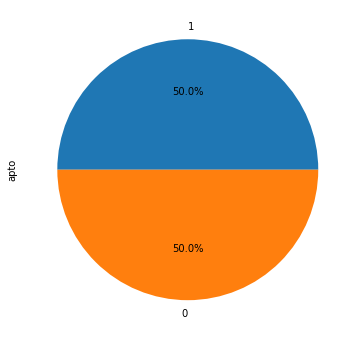

In [22]:
# Visualización del nuevo balance de los datos.
plt.figure(figsize=(10,6))
y_ros.value_counts().plot.pie(autopct="%.1f%%");



------

<font size="7"><span style="color:green">Entrenamiento

---

In [23]:
# Entrenamiento tras el balanceo.
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, stratify=y_ros, random_state=seed)

In [24]:
# Shapes
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (4803, 10)
y_train shape:  (4803,)
X_test shape:  (1201, 10)
y_test shape:  (1201,)


In [25]:
# Guardando datasets de train y test en csv
X_train.to_csv('data/X_train.csv')
y_train.to_csv('data/y_train.csv')
X_test.to_csv('data/X_test.csv')
y_test.to_csv('data/y_test.csv')


------

<font size="7"><span style="color:green">Pipeline

---

In [26]:
# Pipeline
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('kbest', SelectKBest()),
                       ('classifier', LogisticRegression(random_state=seed))])

------

<font size="7"><span style="color:green">GridSearch y mejor modelo

---

In [27]:
# GridSearch

gb_params = {'kbest__k': [8,9,10],
              'classifier': [GradientBoostingClassifier()],
              'classifier__max_depth': [3,4,5,6],
              'classifier__n_estimators': [20,50,100,200],
              'classifier__learning_rate': [0.05, 0.1, 0.2, 0.4, 0.5],            
}


search_space = [gb_params]

clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=3, n_jobs=-1)

In [28]:
# Best model train
best_model = clf.fit(X_train, y_train)


In [30]:
# Guardar el modelo
with open('my_model.model', "wb") as archivo_salida:
    pickle.dump(best_model.best_estimator_, archivo_salida)

In [31]:
best_model

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('kbest', SelectKBest()),
                                       ('classifier',
                                        LogisticRegression(random_state=33))]),
             n_jobs=-1,
             param_grid=[{'classifier': [GradientBoostingClassifier(learning_rate=0.4,
                                                                    max_depth=6)],
                          'classifier__learning_rate': [0.05, 0.1, 0.2, 0.4,
                                                        0.5],
                          'classifier__max_depth': [3, 4, 5, 6],
                          'classifier__n_estimators': [20, 50, 100, 200],
                          'kbest__k': [8, 9, 10]}])

------

<font size="7"><span style="color:green">Predicciones y Accuracy

---

In [32]:
# Predicciones
y_pred = best_model.best_estimator_.predict(X_test)

In [34]:
X_test.shape

(1201, 10)

Best model. Best Score 0.869872996044139 
 --------------------------------------------------
Best model. Best Params {'classifier': GradientBoostingClassifier(learning_rate=0.4, max_depth=6), 'classifier__learning_rate': 0.4, 'classifier__max_depth': 6, 'classifier__n_estimators': 100, 'kbest__k': 10} 
 --------------------------------------------------
Accuracy Score 0.9433805162364696 
 --------------------------------------------------
Confusion Matrix 
 [[591  10]
 [ 58 542]] 
 --------------------------------------------------


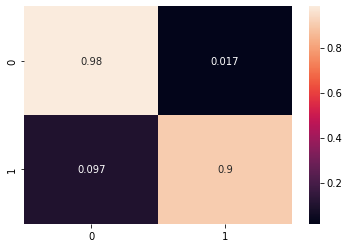

In [33]:
print('Best model. Best Score', best_model.best_score_, '\n','-'*50)
print('Best model. Best Params', best_model.best_params_, '\n','-'*50)
print('Accuracy Score', accuracy_score(y_test, y_pred), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);

------

<font size="7"><span style="color:green">Feature importance

---

In [ ]:
# Feature importance
names=X.columns
importance = best_model.best_estimator_.named_steps["classifier"].feature_importances_

scores = sorted(zip(map(lambda x: round(x, 4), importance), names), reverse=True)
pd.DataFrame(scores, columns=['Score', 'Feature'])

,Score,Feature
0,0.2301,alcohol
1,0.1271,volatile acidity
2,0.1068,free sulfur dioxide
3,0.1047,residual sugar
4,0.0937,bound sulfur dioxide
5,0.0795,pH
6,0.0730,fixed acidity
7,0.0684,citric acid
8,0.0635,chlorides
9,0.0533,sulphates


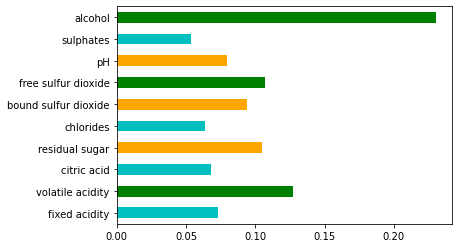

In [ ]:
# Visualización de Feature Importance
colors = ['c', 'g', 'c', 'orange', 'c', 'orange', 'g','orange','c', 'g']

(pd.Series(importance, index=names)
   .plot(kind='barh',color=colors));
